## Laboratorul 2 - LSD

# Programarea functionala

În programarea funcțională, programele sunt construite prin aplicarea și compunerea funcțiilor. Spre deosebire de programarea procedurală, unde se folosesc secvențe de instrucțiuni ce modifică starea programului, programarea funcțională se bazează pe evaluarea funcțiilor matematice, evitând astfel starea și datele mutabile.

Programarea funcțională poate fi folosită pentru a scrie cod mai clar, mai modular și mai ușor de întreținut în anumite contexte. Limbaje precum Haskell, Lisp, Clojure, și Scala sunt exemple de limbaje care pun un accent puternic pe programarea funcțională. Cu toate acestea, programarea funcțională poate fi aplicată și în limbaje precum Python sau JavaScript, într-o anumită măsură.

In [1]:
id = 0

def get_id():
  global id
  id = id + 1
  return id

def some_function():
  global id
  print('do something')
  id+=2

print(get_id())
print(get_id())
some_function()
print(get_id())

1
2
do something
5


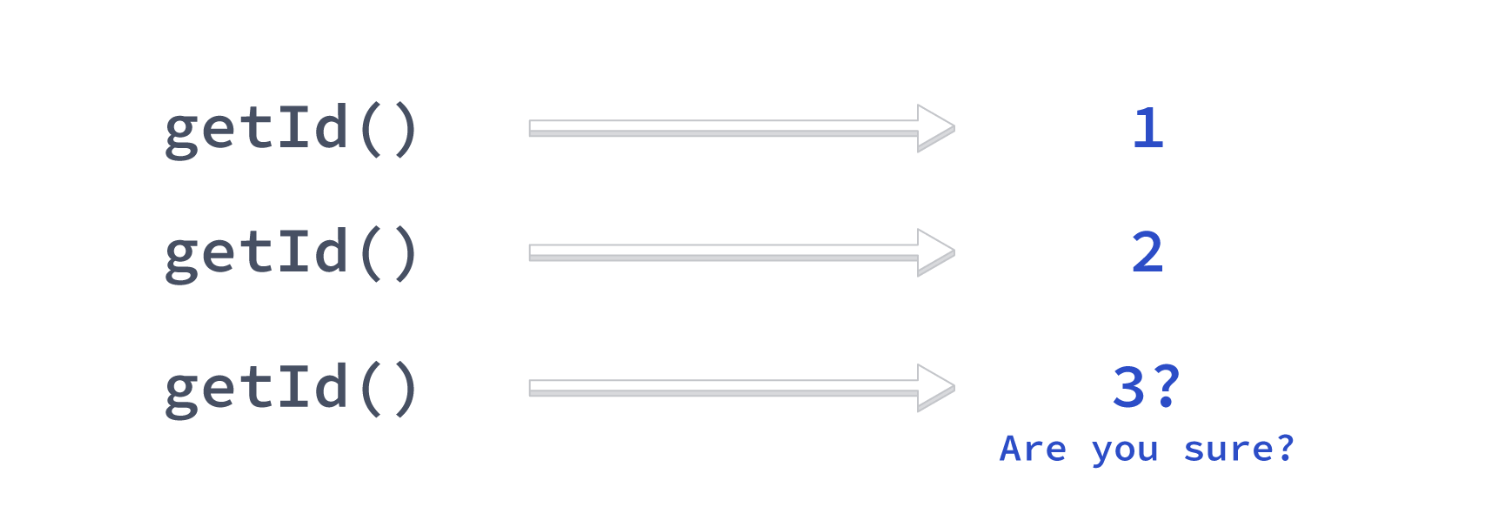

In [3]:
tax = 20

def compute_gst(productPrice):
    return productPrice * (tax / 100) + productPrice;

print(compute_gst(100))

120.0


O funcție pură întotdeauna întoarce aceeași valoare pentru aceleași intrări. Cu alte cuvinte, rezultatul unei funcții pure este predictibil și nu depinde de starea globală sau de schimbările din exteriorul funcției.

O funcție pură nu modifică starea sau datele din afara funcției. Aceasta înseamnă că nu are efecte secundare, cum ar fi modificarea variabilelor globale sau a altor date în afara funcției. Funcțiile pure se bazează doar pe valorile pe care le primesc ca argumente și pe calculele interne.

Observație: Dacă o funcție pură apelează o altă funcție pură, acest lucru nu reprezintă un efect secundar. (Exemplu: folosirea funcției Math.max() într-o funcție)


Python tratează funcțiile ca orice valoare (int, float, ...) pe care ați întâlnit-o până acum.
Puteți de exemplu să asignați unei variabile o funcție:

In [4]:
def suma(a, b):
  return a + b

suma_numere = suma
print(suma_numere(2, 3))

5


Dacă vom vrea să vedem tipul variabilei definite mai sus putem scrie:

In [ ]:
a = -3
print(type(a))
print(type(suma_numere)) #functia din exemplul anterior

<class 'int'>
<class 'function'>


Pentru a facilita scrierea de programe conform paradigmei programării funcționale un
limbaj de programare ar trebui să pună la dispoziție următoarele două mecanisme:

• să poată primi o funcție drept parametru

• să poată returna o funcție (către entitatea care a apelat-o)

Deoarece am văzut mai sus modul în care Python tratează funcțiile, cele două cerințe de mai
sus sunt asigurate cu succes de către Python.

## Funcții ca parametru

O funcție poate la randul său să fie trimisă ca parametru altei funcții. De exemplu, ne putem
defini funcția multiply_5, care ia ca parametru o funcție și un număr. Ne definim și o funcție
simplă numită increment_1, care ia un parametru și îl returnează incrementat cu 1. Acum
putem apela funcția multiply_5 cu parametrii incrementare și un număr, de exemplu 5.

In [ ]:
def increment_by_1(x):
  return x + 1

print(increment_by_1(5))

6


In [ ]:
def multiply_by_5(f, x):
  return f(x) * 5

print(multiply_by_5(increment_by_1, 5))

30


Observatie: funcția multiply_5 poate fi apelată cu orice parametru pentru f, și x. Totuși în
cazul în care am apela-o cu două valori întregi, am avea o eroare la rulare. De aceea e
important să știm ce parametrii așteaptă funcția pe care o apelăm.

## Funcții anonime

Notația `lambda argument : expresie` definește în Python o funcție anonimă (funcție
lambda). Aceasta este o expresie de tip funcție și poate fi deci folosită în alte expresii. Putem
evalua direct fără a fi nevoie să dăm întâi un nume funcției. Acest exemplu simplu ilustrează
că în limbajul Python, o funcție (aici lambda x : x + 3) poate fi folosită la fel de simplu
ca și orice altă valoare.

In [ ]:
(lambda x : x + 3)(2)

5

In [ ]:
(lambda x, y, z: x + y + z)(1, 2, 3)

6

Funcțiile anonime pot fi
folositoare dacă dorim să returnăm o funcție. De exemplu, putem defini o funcție care ne
returnează o funcție de incrementare cu 1 dacă parametrul primit este True sau o funcție de
decrementare cu 1 dacă parametrul primit este False. În acest caz funcțiile anonime sunt
folositoare.

In [ ]:
def return_functie_incrementare(x):
  if x:
    return lambda a: a + 1
  else:
    return lambda a: a - 1

inc = return_functie_incrementare(True)
dec = return_functie_incrementare(False)
print(inc(5))
print(dec(5))

6
4


Se poate observa că rezultatul apelării funcției return_functie_incrementare este salvat în
variabilele inc, respectiv dec. Aceste două variabile sunt la rândul lor funcții, deci pot fi
apelate.
După cum am văzut în subcapitolul anterior, funcțiile pot fi și ele transmise ca parametru. În
loc de o funcție anterior definită, putem trimite o funcție anonimă ca parametru. Astfel,
exemplul cu multiply_5 devine:

In [ ]:
def multiply_by_5(f, x):
  return f(x) * 5

print(multiply_by_5((lambda x: x + 1), 5))

30


## Compunerea funcțiilor

Una din cele mai simple și larg folosite operații cu funcții este compunerea lor, în acest fel
putem obține ușor funcții (prelucrări) complexe pornind de la funcții simple. În matematică,
dacă f : A → B și g : C → A, compunerea f ° g : C → B e definită prin relația (f ° g)(x) = f(g(x)) .
Deci, pornind de la o valoare x ∈ C se obține o valoare g(x) ∈ A, și apoi prin aplicarea
lui f valoarea f(g(x)) ∈ B .
în Python putem defini o funcție de compoziție cu doi parametrii, care returnează o altă
funcție, reprezentând funcția f compusă cu funcția g.

In [ ]:
def comp(f,g):
  return lambda x : f(g(x))

def f1(x):
  return x * 2

def f2(x):
  return x + 1

In [ ]:
f = comp(f1, f2)
print(f(6))

14


In [ ]:
f = comp(f2, f1)
print(f(6))

13


Apelarea funcției comp cu parametrii f1 și f2, care sunt la rândul lor tot funcții, ne dă o altă
funcție. Bineînțeles, ordinea în care dăm parametrii contează, astfel că rezultatul primei
compuneri este o funcție diferită de rezultatul celeilalte compuneri. Acest lucru se poate
vedea și prin faptul că rezultatele apelării loc cu același parametru.

În particular, dacă o funcție are același domeniu de definiție și de valori, poate fi compusă cu
ea însăși: f ° f, unde f : A → A . Pornind de la funcția de compunere comp putem defini o
funcție de ordin superior care compune o funcție (dată ca parametru) cu ea însăși.

In [ ]:
def appl2(f):
 return comp(f, f)

In [ ]:
f = appl2(f1)
print(f(6)) # cum da 24? 6 * 2 * 2

24


In [ ]:
appl4 = comp(appl2, appl2)

f = appl4(f1)
print(f(6))

96


## Operatorii ca funcții

Pentru a avea acces la operatori trebuie sa importam modulul operator. Apoi putem folosi un
operator in felul urmator:

In [ ]:
import operator

print(operator.add(2,3))

5


Mai multe detalii [link1](https://www.geeksforgeeks.org/operator-functions-in-python-set-1/) sau [link2](https://docs.python.org/3/library/operator.html)

Ne putem defini o funcție generică de operații, care ia ca parametrii o funcție care
reprezintă operația pe care vrem să o efectueze și două valori numerice. Funcția se definește
și se apelează astfel:

In [ ]:
def operatie_generica(op, x, y):
  return op(x, y)

print(operatie_generica(operator.add, 3, 4))

## Funcții cu parametrii impliciți (default)

Python ne premite să declarăm funcții cu parametrii care au o valoare implicită. Astfel de
funcții pot fi apelate și normal, dar și fără a da o valoare parametrului cu valoare implicită. În
acest caz, parametrul va fi egal cu valoarea implicită. Mai jos se poate vedea un exemplu de
funcție care are un parametru implicit.

In [ ]:
def increment(x = 0):
  return x + 1

In [ ]:
print(increment(4))

5


In [ ]:
print(increment())

1


În cazul în care avem o funcție cu mai mulți parametrii, dintre care unii impliciți, este
important ca parametrii impliciți să se afle la finalul listei de parametrii. De exemplu, nu
putem avea o funcție cu primul parametru implicit și al doilea explicit. Mai jos se poate
vedea un exemplu cu mai mulți parametrii. Este indicat să îl rulați pentru a înțelege cum
funcționează parametrii expliciți în funcții cu mai mulți parametrii.

In [7]:
def print_params(a, x = "a", y = "b", z = "c"):
  print(a, x, y, z) # a, b, c, d

print_params("a", "b", "c", "d")

a b c d


In [ ]:
print_params("aaa")

aaa a b c


In [ ]:
print_params("aaa", "x")

aaa x b c


In [ ]:
print_params("aaa", "y")

aaa y b c


In [ ]:
print_params("aaa", y = "x")

aaa a x c


In [ ]:
print_params("1", "2", "3", "4")

1 2 3 4


## Functii cu numar variabil de argumente

Argumentele arbitrare (args): Cu ajutorul argumentelor arbitrare, o funcție poate accepta un număr variabil de argumente poziționale (valori) și le tratează ca un tuplu în interiorul funcției. Puteți utiliza asteriscul * înaintea numelui argumentului pentru a indica că este un argument arbitrar.

In [ ]:
def functie_cu_args(*args):
    for argument in args:
        print(argument)

In [ ]:
functie_cu_args(1, 2, 3, 4, 5)

1
2
3
4
5


In [ ]:
functie_cu_args(1, 2)

1
2


Argumentele arbitrare numite permit funcțiilor să accepte un număr variabil de argumente cu nume (perechi cheie-valoare) și le tratează ca un dicționar în interiorul funcției. Utilizați dublul asterisc ** înaintea numelui argumentului pentru a indica că este un argument arbitrar numit.

In [8]:
def functie_cu_kwargs(**kwargs):
    for cheie, valoare in kwargs.items():
        print(f"{cheie}: {valoare}")

functie_cu_kwargs(numar=42, text="Salut", boolean=True)

numar: 42
text: Salut
boolean: True


## Exercitii

EXERCITIUL 1

Scrieți o funcție cu trei parametri (de același tip oarecare), care returnează câte valori
distincte există între argumentele primite (unul, două sau trei) și tipărește, după caz, un
mesaj: "toate argumentele sunt distincte/egale" sau "argumentele 1 și 2 (resp. 2 și 3, sau 1 și
3) sunt egale". Evitați pe cât posibil duplicarea de cod: pentru porțiuni de cod similare, creați
(și apelați) o funcție care conține partea comună și are ca parametri valorile care diferă.

In [9]:
def compare2(x, y, poz1, poz2):
    if x == y:
        print(f"argumentele {poz1} și {poz2} sunt egale")

def compare3(x, y, z):
    if x == y == z:
        print("toate argumentele sunt egale")
    elif x != y != z:
        print("toate argumentele sunt distincte")
    else:
        compare2(x, y, 1, 2)
        compare2(x, z, 1, 3)
        compare2(y, z, 2, 3)


a = 1
b = 1
c = 5
compare3(a, b, c)

argumentele 1 și 2 sunt egale


EXERCITIUL 2

Scrieți o funcție care calculează mediana a trei valori (valoarea aflată între celelalte două).
Încercați să scrieți cod cât mai simplu, și să nu-l repetați. Puteți folosi o funcție auxiliară care
calculează mediana a trei numere, pentru care știm că primul e mai mic sau egal decât al
doilea. Sau puteți încerca să compuneți doar funcțiile standard max/min de două elemente
(expresia trebuie să fie oarecum simetrică). Care din variante necesită mai puține
comparații?

In [10]:
def mediana(a, b, c):
    return a + b + c - min(a, b, c) - max(a, b, c)

print(mediana(1, 2, 3))

2


EXERCITIUL 3

În matematică, am extins operatorul + de la numere la funcții, definind funcția f +
g prin relația (f + g)(x) = f(x) + g(x)

a) Definiți o funcție care ia ca parametru două funcții f și g și returnează funcția definită ca
suma lor prin relația de mai sus.

b) Scrieți o funcție mai generală, care primește ca parametru și operatorul binar (o funcție
de două argumente) care e aplicată celor două funcții. Verificați că o puteți folosi
cu operator.add și operator.sub pentru a calcula suma și diferența, dar încercați și alți
operatori.

In [13]:
import operator

def suma_compunere(f, g):
    return lambda x : f(x) + g(x)

def compunere_operator(f, g, operatorul):
    return lambda x : operatorul(f(x), g(x))

def f(x):
    return x

def g(x):
    return x

print(suma_compunere(f, g)(2))

print(compunere_operator(f, g, operator.pow)(3))

4
27


EXERCITIUL 4:

a)Scrieti o functie care calculeaza aria unui dreptunghi (parametrii functiei vor fi lungimea si latimea)

b) Scrieti o functie care calculeaza aria totala a unui paralelipiped dreptunghic (parametrii functiei vor fi lungimea, latimea si inaltimea). Folositi functia de la a)  

In [ ]:
def arie(lungime, latime):
    return lungime * latime

def aria_totala_paralelipiped(lungime, latime, inaltime):
    return 2 * arie(lungime, latime) + 2 * arie(lungime, inaltime) + 2 * arie(latime, inaltime)

EXERCITIUL 5

Scrieti o funcție anonima care adaugă 15 la un număr dat ca argument.

In [14]:
print((lambda x : x + 15)(5))

20


EXERCITIUL 6

Sa se defineasca o functie cu numar variabil de argumente, def polinom(punct, grad, ...), pentru calculul valorii unui polinom intr-un punct x dat
(valoare reala). Functia va accepta urmatoarele argumente: primul argument va fi numarul real x, al doilea va fi
un numar intreg n ce va reprezenta gradul polinomului, urmatoarele n+1 argumente vor reprezenta coeficientii
termenilor de grade n, n-1, ..., 1, 0 (numere reale).

Exemplu:polinom(1.1,3,1.0,-2.0,0.5,1.3) corespunde polinomului X^3-2X^2+0.5X+1.3
=>0.761

In [15]:
def polinom(*args):
    x = args[0]
    n = args[1]
    result = 0
    for i in range(n+1):
        result += args[i+2] * (x ** (n - i))
    return result

print(polinom(1.1,3,1.0,-2.0,0.5,1.3))


0.7610000000000001


EXERCITIUL 7

Sa se defineasca o functie def eliminare_caracter(character, ...) care primeste ca prim argument
un caracter, iar apoi sirurile de caractere propriu-zise. Functia va
genera si returna sirul concatenat din sirurile primite ca argumente din care au fost eliminate caracterele character.

In [16]:
def eliminare_caracter(*args):
    caracter = args[0]
    result = ''
    for string in args[1:]:
        result += string.replace(caracter, '')
    return result

print(eliminare_caracter('a', 'ana', 'are', 'mere'))

nremere


EXERCITIUL 8

În New York, o călătorie cu transportul în comun costă $2.75. La încărcarea cardului de transport se acceptă doar sume în multipli de 5 cenți. Pentru încărcarea cu valoarea a cel puțin două călătorii se oferă o reducere de 5%, rotunjita la cent. Scrieți o funcție care calculează și returnează suma minimă care trebuie incărcată pentru N călătorii, precum și reducerea care a fost acordata.

Exemplu:

N = 3 => 2.75  * 3 = $8.25

Reducere: $0.40

 (5% din $8.25 = 0.4125, rotunjita la un multiplu de 5 centi)


Suma minima care trebuie incarcata: $7.85 (8.25 - 0.4)

In [17]:
import math

def calculate_amount(N):
    total_cost = 2.75 * N
    discount = round(total_cost * 0.05 * 20) / 20  # round to nearest multiple of 0.05
    min_amount = total_cost - discount
    return min_amount, discount

N = 3
min_amount, discount = calculate_amount(N)
print(f'Minimum amount: ${min_amount:.2f}')
print(f'Discount: ${discount:.2f}')

Minimum amount: $7.85
Discount: $0.40
